<a href="https://colab.research.google.com/github/helynecheverry/dataset/blob/main/parcialfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El primer paso consiste en explorar y entender los datos.

Carga de datos: Se leen dos conjuntos de datos desde URLs en formato CSV usando pandas.

Vista inicial de los datos:

**df.head(5):** Muestra las primeras filas del DataFrame.
**df.info():** Proporciona detalles sobre el tipo de datos y valores nulos.
**df.describe()**: Genera estadísticas descriptivas como promedio, mediana, etc.
**df.nunique():** Informa cuántos valores únicos hay por columna.
**df.isnull().sum():** Revisa cuántos valores nulos hay por columna.
Visualización:

Se genera un mapa de calor **(sns.heatmap) **para examinar la relación entre las columnas categóricas** prestador_de_Servicio** y **nombreestablecimiento**.
Un gráfico de dispersión **(scatter plot)** muestra las relaciones entre las mismas columnas.
2.** Regresión Lineal**
**regresión lineal simple** y **múltiple para modelar** relaciones entre características y realizar predicciones:

a) **Regresión Lineal Simple**
Objetivo: Predecir la columna nombreestablecimiento a partir de prestador_de_Servicio.
Pasos realizados:
**Extracción de las variables dependientes e independientes (x y y).**
División de los datos en conjuntos de entrenamiento y prueba usando train_test_split.
Transformación de datos categóricos con LabelEncoder.
Entrenamiento de un modelo de regresión lineal (LinearRegression).
Evaluación del modelo con métricas como el coeficiente de determinación
𝑅
2
R
2
 .
b) **Regresión Lineal Múltiple**
Objetivo: Predecir Ciudad a partir de varias variables predictoras como Codigo Entidad y Saldo CDP.
Pasos realizados:
Codificación de columnas categóricas (Saldo CDP) usando OneHotEncoder dentro de un ColumnTransformer.
División de datos en entrenamiento y prueba.
Entrenamiento del modelo.
Realización de predicciones con nuevos datos preprocesados.
3. **Manejo de Datos Categóricos**
Dado que algunas variables como prestador_de_Servicio, nombreestablecimiento, y Saldo CDP son categóricas, se convierten a una representación numérica adecuada utilizando técnicas como:
LabelEncoder: Para variables con una sola etiqueta.
OneHotEncoder: Para variables con múltiples categorías, transformándolas en columnas binarias.
4. **Predicciones con Nuevos Datos**
El modelo entrenado se utiliza para predecir valores en un conjunto de nuevos datos (nuevos_datos), que son transformados previamente para ajustarse al formato que el modelo espera.

5. **Herramientas Utilizadas**
Librerías:
pandas y numpy: Para la manipulación y análisis de datos.
matplotlib y seaborn: Para la visualización de datos.
sklearn: Para preprocesamiento, división de datos, codificación categórica, y modelos de regresión.
Modelos: LinearRegression se usa como técnica de regresión lineal simple y múltiple.

In [3]:
# librerias y herramientas visuales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
 # Listado de colegio de bogota
df= pd.read_csv("https://paste.c-net.org/GorillasLarkin")


In [21]:
# 5 primeros datos
df.head(5)


,año,secretaria,nombreestablecimiento,zona,direccion,telefono,nombre_Rector,tipo_Establecimiento,etnias,sector,...,numero_de_Sedes,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,calendario,internado,estrato_Socio_Economico,correo_Electronico
0,2016,BOGOTA,1475,URBANA,KR 5 11 67,5665677 / 3429092,YOLANDA ARIAS CRUZ,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,pitagoras@pitagoras.edu.co
1,2016,BOGOTA,1385,URBANA,CL 32 SUR 52 A 54,7100349,SANDRA MILENA MENDEZ,CENTRO EDUCATIVO,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,gimfedebel@hotmail.com
2,2016,BOGOTA,1387,URBANA,CL 134 D 47 27,6010350,CLAUDIA BOCACHICA SAENZ,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,claudialindenibocachica@hotmail.com
3,2016,BOGOTA,834,URBANA,KR 28 63 64,2126019 -- 2481271,JOSE CUSTODIO GALARZA MORENO,INSTITUCION EDUCATIVA,NaN,NaN,...,4,NaN,OFICIAL,OFICIAL,NO APLICA,NO,A,NaN,NaN,cedalemania12@redp.edu.co
4,2016,BOGOTA,605,URBANA,KR 2 C 3 18 SUR,2804738 -- 4714934,GLORIA ESPERANZA CHUQUIN LAISECA,CENTRO EDUCATIVO,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,colegiosanjuanviateh@hotmail.com -- colegiosan...


In [22]:
# informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        2404 non-null   int64  
 1   secretaria                 2404 non-null   object 
 2   nombreestablecimiento      2404 non-null   int16  
 3   zona                       2404 non-null   object 
 4   direccion                  2404 non-null   object 
 5   telefono                   2342 non-null   object 
 6   nombre_Rector              2404 non-null   object 
 7   tipo_Establecimiento       2404 non-null   object 
 8   etnias                     71 non-null     object 
 9   sector                     0 non-null      float64
 10  genero                     0 non-null      float64
 11  niveles                    2388 non-null   object 
 12  jornadas                   2391 non-null   object 
 13  caracter                   0 non-null      float

In [23]:
df.describe()

,año,nombreestablecimiento,sector,genero,caracter,numero_de_Sedes,estado,internado
count,2404.0,2404.000000,0.0,0.0,0.0,2404.000000,0.0,0.0
mean,2016.0,1191.381864,NaN,NaN,NaN,1.165973,NaN,NaN
std,0.0,688.356231,NaN,NaN,NaN,0.657483,NaN,NaN
min,2016.0,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2016.0,596.750000,NaN,NaN,NaN,1.000000,NaN,NaN
50%,2016.0,1187.500000,NaN,NaN,NaN,1.000000,NaN,NaN
75%,2016.0,1786.250000,NaN,NaN,NaN,1.000000,NaN,NaN
max,2016.0,2386.000000,NaN,NaN,NaN,14.000000,NaN,NaN


In [24]:
df.nunique()

,0
año,1
secretaria,1
nombreestablecimiento,2387
zona,3
direccion,2377
telefono,2328
nombre_Rector,2354
tipo_Establecimiento,2
etnias,11
sector,0


In [27]:
df.isnull().sum

<bound method DataFrame.sum of         año  secretaria  nombreestablecimiento   zona  direccion  telefono  \
0     False       False                  False  False      False     False   
1     False       False                  False  False      False     False   
2     False       False                  False  False      False     False   
3     False       False                  False  False      False     False   
4     False       False                  False  False      False     False   
...     ...         ...                    ...    ...        ...       ...   
2399  False       False                  False  False      False     False   
2400  False       False                  False  False      False     False   
2401  False       False                  False  False      False     False   
2402  False       False                  False  False      False     False   
2403  False       False                  False  False      False     False   

      nombre_Rector  tipo_Establecimiento  etnias  sector  ...  \
0             False                 False    True    True  ...   
1             False                 False    True    True  ...   
2             False                 False    True    True  ...   
3             False                 False    True    True  ...   
4             False                 False    True    True  ...   
...             ...                   ...     ...     ...  ...   
2399          False                 False    True    True  ...   
2400          False                 False    True    True  ...   
2401          False                 False    True    True  ...   
2402          False                 False    True    True  ...   
2403          False                 False    True    True  ...   

      numero_de_Sedes  estado  prestador_de_Servicio  propiedad_Planta_Fisica  \
0               False    True                  False                    False   
1               False    True                  False                    False   
2               False    True                  False                    False   
3               False    True                  False                    False   
4               False    True                  False                    False   
...               ...     ...                    ...                      ...   
2399            False    True                  False                    False   
2400            False    True                  False                    False   
2401            False    True                  False                    False   
2402            False    True                  False                    False   
2403            False    True                  False                    False   

      resguardo  matricula_Contratada  calendario  internado  \
0         False                 False       False       True   
1         False                 False       False       True   
2         False                 False       False       True   
3         False                 False       False       True   
4         False                 False       False       True   
...         ...                   ...         ...        ...   
2399      False                 False       False       True   
2400      False                 False       False       True   
2401      False                 False       False       True   
2402      False                 False       False       True   
2403      False                 False       False       True   

      estrato_Socio_Economico  correo_Electronico  
0                        True               False  
1                        True               False  
2                        True               False  
3                        True               False  
4                        True               False  
...                       ...                 ...  
2399                     True               False  
2400                     True               False  
2401                     True

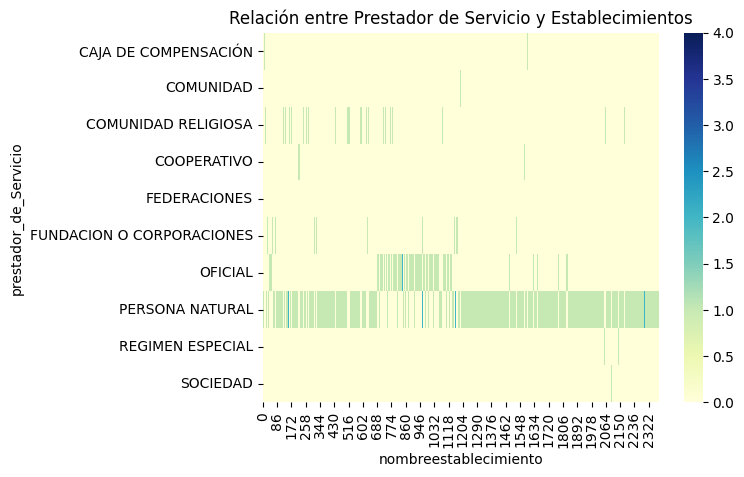

In [31]:
# mapa de calor para relacionar entre dos columnas categoricas.
crosstab = pd.crosstab(df['prestador_de_Servicio'], df['nombreestablecimiento'])
sns.heatmap(crosstab, cmap="YlGnBu", annot=False)
plt.title("Relación entre Prestador de Servicio y Establecimientos")
plt.show()

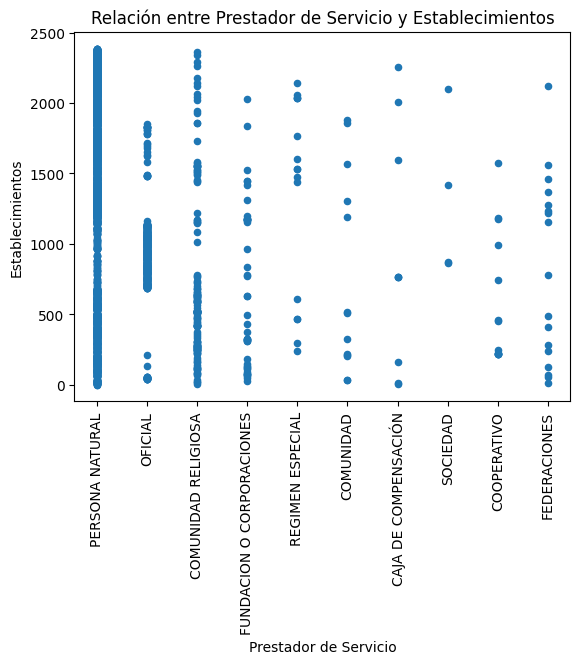

In [39]:
# Gráfico de dispersión entre dos columnas
ax=df.plot(kind="scatter", x="prestador_de_Servicio", y="nombreestablecimiento")
plt.title("Relación entre Prestador de Servicio y Establecimientos")
ax.set_xlabel("Prestador de Servicio")
ax.set_ylabel("Establecimientos")
ax.tick_params(axis="x", rotation=90)

plt.show()


In [40]:
# extraer x/y
x= df["prestador_de_Servicio"].values.reshape(-1,1)
y= df["nombreestablecimiento"].values.reshape(-1,1)

In [41]:
x.shape, y.shape

((2404, 1), (2404, 1))

In [45]:
#Separar Train / Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
#creae un modelo
from sklearn.linear_model import LinearRegression

In [51]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# ajustar la transformacion en toda la matriz
x_train = encoder.fit_transform(x_train.ravel())
x_test = encoder.transform(x_test.ravel())

# revierte a su forma si es necesario
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)


In [53]:
# entrenar el modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

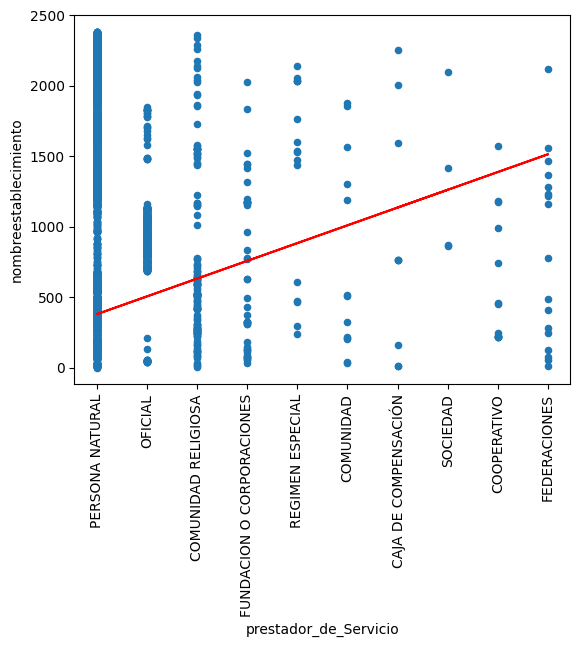

In [58]:
ax=df.plot(kind='scatter', x="prestador_de_Servicio", y="nombreestablecimiento");
plt.plot(x_train, modelo.predict(x_train), color='red');
ax.tick_params(axis="x", rotation=90)
plt.show()

In [121]:
#realizar predicciones
y_pred = modelo.predict(x_test)

In [122]:
# evaluacion
pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten()})

,y_test,y_pred
0,161,141.399693
1,179,133.210643
2,24,141.499757
3,27,140.691526
4,187,139.690010
...,...,...
1610,172,139.377845
1611,197,139.998590
1612,25,138.591885
1613,121,141.509235


In [123]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0005779987501861594

In [63]:
modelo.predict([[20]])

array([[2901.38562742]])

**REGRESION** **LINEAL MULTIPLE**





In [76]:
# PAE
df = pd.read_csv('https://paste.c-net.org/DumberKiller')

In [77]:
df

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Anno BPIN,Saldo CDP,Saldo Vigencia,EsPostConflicto,URLProceso,Destino Gasto,Origen de los Recursos,Codigo Entidad,Fecha Inicio Liquidacion,Fecha Fin Liquidacion
0,DEPARTAMENTO DE SANTANDER,890201235,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.6762202,...,No D,0,0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,701515082,NaN,NaN
1,GOBERNACIÓN DEL DEPARTAMENTO ARCHIPIELAGO DE S...,892400038,"San Andrés, Providencia y Santa Catalina",San Andrés,"Colombia, San Andrés, Providencia y Santa Cat...",Territorial,No aplica/No pertenece,Ejecutivo,Descentralizada,CO1.BDOS.1805479,...,2022,46554300,0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Distribuido,702318460,NaN,NaN
2,ALCALDIA MUNICIPIO DE DOSQUEBRADAS,800099310,Risaralda,Dosquebradas,"Colombia, Risaralda , Dosquebradas",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.4639678,...,No D,23466666,0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Distribuido,704187608,NaN,NaN
3,ALCALDIA MUNICIPAL DE BUGA,891380033,Valle del Cauca,Guadalajara De Buga,"Colombia, Valle del Cauca , Guadalajara De Buga",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.5617041,...,No D,0,0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Recursos Propios,704246388,NaN,NaN
4,GOBERNACION DE NARIÑO *,800103923,Nariño,Pasto,"Colombia, Nariño , Pasto",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.4256563,...,No D,18036000,0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,700694045,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8068,GOBERNACION DE NARIÑO *,800103923,Nariño,Pasto,"Colombia, Nariño , Pasto",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.6651985,...,No D,0,0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,700694045,NaN,NaN
8069,MUNICIPIO DE EL SANTUARIO ANTIOQUIA,890983813,Antioquia,El Santuario,"Colombia, Antioquia , El Santuario",Territorial,No aplica/No pertenece,Corporación Autónoma,Descentralizada,CO1.BDOS.4095989,...,No D,0,0,No,https://community.secop.gov.co/Public/Tenderin...,No Definido,Distribuido,700537129,10/01/2023 12:00:00 AM,02/28/2024 12:00:00 AM
8070,REGIONAL DE ASEGURAMIENTO EN SALUD No. 4,805022186,Valle del Cauca,Cali,"Colombia, Valle del Cauca, Cali",Nacional,defensa,Ejecutivo,Descentralizada,CO1.BDOS.2875649,...,2024,50000000,0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,702289612,06/30/2023 12:00:00 AM,10/31/2023 12:00:00 AM
8071,DEPARTAMENTO DE ANTIOQUIA,890900286,Antioquia,Medellín,"Colombia, Antioquia , Medellín",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.6227110,...,No D,1386815160,0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Distribuido,700256027,11/30/2024 12:00:00 AM,03/30/2025 12:00:00 AM


In [125]:
#extraer x/y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1, 1)
print(X.shape, y.shape)

(8073, 53) (8073, 1)


Codificacion de datos categoricos

In [127]:
df['Sector'].unique()

array(['Servicio Público', 'No aplica/No pertenece', 'Educación Nacional',
       'Planeación', 'interior', 'Información Estadística', 'Trabajo',
       'Vivienda, Ciudad y Territorio', 'defensa',
       'Salud y Protección Social', 'deportes',
       'Ambiente y Desarrollo Sostenible', 'Industria',
       'Inclusión Social y Reconciliación', 'Ley de Justicia',
       'Transporte', 'Cultura', 'Ciencia Tecnología',
       'Presidencia de la República', 'Minas y Energía',
       'Hacienda y Crédito Público'], dtype=object)

In [83]:
x

array([['PERSONA NATURAL'],
       ['PERSONA NATURAL'],
       ['PERSONA NATURAL'],
       ...,
       ['PERSONA NATURAL'],
       ['PERSONA NATURAL'],
       ['PERSONA NATURAL']], dtype=object)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [128]:
# Importar pandas para la manipulacion del df
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df[['Codigo Entidad', 'Saldo CDP']]
y = df['Ciudad']



from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


columnas_categoricas = ['Saldo CDP']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
    ],
    remainder='passthrough'
)


x_train = preprocessor.fit_transform(X_train)
x_test = preprocessor.transform(X_test)


modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [107]:
X = df.drop("Saldo CDP", axis=1)  # Variables predictoras
y = df["Ciudad"]  # Variable objetivo



In [132]:
nuevos_datos = pd.DataFrame([
    {'Codigo Entidad': 1, 'Saldo CDP': 200000},
    {'Codigo Entidad': 0, 'Saldo CDP': 200000},
    {'Codigo Entidad': 0, 'Saldo CDP': 300000},
    {'Codigo Entidad': 0, 'Saldo CDP': 300000}
])

nuevos_datos_transformados = preprocessor.transform(nuevos_datos)

# Predice usando los datos preprocesados
y_pred = modelo.predict(nuevos_datos_transformados)
print(y_pred)


[745.76758164 745.7675825  745.7675825  745.7675825 ]
